<img  align="right" width="500" src="recycling centre - pic.JPG" style= "float: right; margin: 0 50px 50px 50px;">

# Booking system project - UNDER DEVELOPMENT

## Insights discovery to increase operational efficiencies at Recycling Centres


<hr class="solid" color="green">


### In this project, booking system data from four recycling centres located in London are analysed to identify trends and patters for data-driven decisions. 
### - Data cleaning and transformation was done as data quality issues were identified. 
### - All personal/sensitive data from datasets was encrypted or deleted for GDPR compliance.

<hr style="margin-bottom: 40px;">

### Main insights:


### Import of libraries

In [1]:


import numpy as np 
import pandas as pd
import random
import seaborn as sns 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from matplotlib.patches import ConnectionPatch


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,8)

from datetime import datetime
import ipywidgets as widgets

### Import of all datasets 

In [2]:
Recycling_centreA = pd.read_excel(r'C:\Users\Tiago S\Desktop\Github repositories\Python_Coding\Booking system project\Recycling center A.xlsx')
Recycling_centreC = pd.read_excel(r'C:\Users\Tiago S\Desktop\Github repositories\Python_Coding\Booking system project\Recycling center C.xlsx')
Recycling_centreD = pd.read_excel(r'C:\Users\Tiago S\Desktop\Github repositories\Python_Coding\Booking system project\Recycling center D.xlsx')
Recycling_centreS = pd.read_excel(r'C:\Users\Tiago S\Desktop\Github repositories\Python_Coding\Booking system project\Recycling center S.xlsx')

### Preview of datasets

In [3]:
Recycling_centreA.head()

,Booking created,dress,Ward,Type of vehicle,Site,Are you hiring a vehicle?,Registration plate (AMENDED),Batteries (car & household),Books,Bulky non-recyclables,...,Tyres (maximum 2),Wooden furniture (whole or dismantled),Asbestos (needs to be double wrapped),Garden wood (decking/fencing/shed),Kitchen and bathroom fixtures and fixings,Plasterboard,Soil and turf,Wooden flooring (including laminate),Booking date/time,ClosureReason
0,2024-01-16 11:48:59,"enue, Wembley, HA9 8QG",Preston,Car,Recycling Centre A,No,VEHICLE,No,No,Yes,...,No,No,No,No,No,No,No,No,2024-02-10 12:30:00,No show
1,2024-01-23 15:28:36,"twood House Wood Lane, London, W12 7DR",NaN,Car,Recycling Centre A,No,VEHICLE,No,No,No,...,No,No,No,No,No,No,No,No,2024-02-04 14:00:00,Cancelled by customer
2,2024-01-24 08:22:22,"s Road, London, NW10 4AP",NaN,Car,Recycling Centre A,No,VEHICLE,No,Yes,Yes,...,No,Yes,No,No,No,No,No,No,2024-02-03 13:00:00,Cancelled by customer
3,2024-01-25 19:48:30,"d Road, London, NW10 5QD",Kensal Green,Large van,Recycling Centre A,Yes,HIRE VEHICLE,No,No,No,...,No,No,No,No,No,No,No,No,2024-02-01 13:00:00,No show
4,2024-01-26 12:11:51,"Hill Lane, London, NW2 6HH",Dollis Hill,Car,Recycling Centre A,No,VEHICLE,No,No,Yes,...,No,No,No,No,No,No,No,No,2024-02-03 10:00:00,Complete


In [4]:
Recycling_centreD.head()

,Booking created,Unnamed: 1,Ward,Type of vehicle,Are you hiring a vehicle?,Registration plate - amended,Site,Batteries (car & household),Books,Bulky non-recyclables,...,Scrap metal,Small electrical appliances,Soil and turf,Thinners/Solvents/Chemicals,Toner cartridges,TVs and monitors,Wood and timber,Hardcore and rubble,Booking date/time,ClosureReason
0,2023-04-03 09:03:11,", Twickenham, TW2 7PU",NaN,Car,No,VEHICLE,Recycling Centre D,No,No,No,...,No,No,No,No,No,No,Yes,No,2024-02-08 12:00:00,No show
1,2023-12-03 07:55:16,"don, SW14 8PT",Mortlake and Barnes Common,Car,No,VEHICLE,Recycling Centre D,No,No,Yes,...,No,No,No,No,No,No,No,No,2024-02-03 10:00:00,No show
2,2023-12-03 21:18:22,"kenham, TW2 5TH",South Twickenham,Car,No,VEHICLE,Recycling Centre D,No,Yes,No,...,No,No,No,No,No,No,Yes,No,2024-02-23 11:00:00,No show
3,2023-12-21 20:45:08,"en Dragon Lane, Brentford, TW8 0DF",Brentford,Car,No,VEHICLE,Recycling Centre D,No,No,No,...,No,No,No,No,No,No,Yes,No,2024-02-04 09:00:00,No show
4,2024-01-01 22:09:20,", Richmond, TW10 5DJ",North Richmond,Car,No,VEHICLE,Recycling Centre D,No,No,Yes,...,Yes,No,No,No,No,No,Yes,No,2024-02-03 11:30:00,No show


In [5]:
Recycling_centreS.head()

,Booking created,Unnamed: 1,Ward,Vehicle Type,Are you hiring a vehicle?,Registration plates,Site,Batteries (car & household),Books,Bulky non-recyclables,...,Scrap metal,Small electrical appliances,Toner cartridges,TVs and monitors,Wooden furniture (whole or dismantled),Garden wood (decking/fencing/shed),Hardcore and rubble,Wooden flooring (including laminate),Booking date/time,ClosureReason
0,2024-01-16 23:41:39,", Feltham, TW13 4JJ",Feltham West,All,No,VEHICLE,Recycling Center S,No,No,No,...,No,No,No,No,Yes,No,No,No,2024-02-09 14:00:00,No show
1,2024-01-17 08:30:22,"itton, TW3 2LU",Heathfield,All,No,VEHICLE,Recycling Center S,No,No,Yes,...,No,Yes,No,No,Yes,No,No,No,2024-02-02 08:00:00,No show
2,2024-01-18 16:07:02,"ad, Brentford, TW8 9JQ",NaN,All,No,VEHICLE,Recycling Center S,Yes,No,Yes,...,No,Yes,Yes,No,No,No,No,No,2024-02-06 14:00:00,No show
3,2024-01-20 05:37:16,"rth, TW7 7HS",Isleworth,All,No,VEHICLE,Recycling Center S,No,Yes,No,...,No,No,No,No,No,No,No,No,2024-02-03 08:30:00,No show
4,2024-01-22 09:43:41,"mpton, TW12 3YJ",Hampton North,All,No,VEHICLE,Recycling Center S,No,No,Yes,...,No,Yes,No,No,Yes,No,No,No,2024-02-04 14:30:00,No show


## Data Cleaning

#### From the preview of the datasets, it can be verified that the column headers are different. To ensure consistency and no columns duplicates in the appending process, all column headers were compared to ensure consistent terminology

In [39]:
Recycling_centreA_cols = pd.Series(Recycling_centreA.columns)
Recycling_centreC_cols = pd.Series(Recycling_centreC.columns)
Recycling_centreD_cols = pd.Series(Recycling_centreD.columns)
Recycling_centreS_cols = pd.Series(Recycling_centreS.columns)
All_reports_headings = pd.DataFrame({'A_wasteproduct':Recycling_centreA_cols,
                                     'C_wasteproduct':Recycling_centreC_cols,
                                     'D_wasteproduct':Recycling_centreD_cols,
                                     'S_wasteproduct':Recycling_centreS_cols})
All_reports_headings.stack().sort_values()

5   A_wasteproduct                            Are you hiring a vehicle?
4   S_wasteproduct                            Are you hiring a vehicle?
    D_wasteproduct                            Are you hiring a vehicle?
    C_wasteproduct                            Are you hiring a vehicle?
33  A_wasteproduct                Asbestos (needs to be double wrapped)
7   S_wasteproduct                          Batteries (car & household)
    C_wasteproduct                          Batteries (car & household)
    A_wasteproduct                          Batteries (car & household)
    D_wasteproduct                          Batteries (car & household)
0   A_wasteproduct                                      Booking created
    S_wasteproduct                                      Booking created
    C_wasteproduct                                      Booking created
    D_wasteproduct                                      Booking created
39  A_wasteproduct                                    Booking da

#### It was verified that some column headers were mispelled so they were renamed to ensure data consistency

In [7]:
Recycling_centreA.rename(columns = {'Mattresses (from your home only)':'Mattress(es)'
                                    ,'Registration plate (AMENDED)':'Vehicle reg'
                                    ,'dress':'Postcode'
                                    }, inplace=True)

Recycling_centreS.rename(columns ={'Mattresses (from your home only)':'Mattress(es)'
                                   ,'Registration plates':'Vehicle reg'
                                   ,'Vehicle Type':'Type of vehicle'
                                   ,'Unnamed: 1':"Postcode"
                                   }, inplace=True)

Recycling_centreD.rename(columns ={'Gas bottles':'Gas bottles (small)'
                                   ,'Registration plate - amended':'Vehicle reg'
                                   ,'Unnamed: 1':"Postcode"
                                   },inplace=True)

Recycling_centreC.rename(columns ={'Mattresses (from your home only - max 2, read chargeable item details)':'Mattress(es)'
                                   ,'Registration plate (amended)':'Vehicle reg'
                                   ,'Unnamed: 1':"Postcode"
                                    }, inplace=True)


### As column headers are matching between datasets, a main dataset was created using append() function

In [8]:
#Append all datasets in one main dataset

Main_dataset = pd.concat([Recycling_centreA,
                          Recycling_centreS,
                          Recycling_centreD,
                          Recycling_centreC], ignore_index=True)

### Data trimming of the column 'Postcode'

In [9]:
Main_dataset['Postcode']=Main_dataset['Postcode'].str[-7:-1]

### Extraction of date and times for certain columns

In [10]:
Main_dataset[['Booking_date','Booking_time']]=Main_dataset['Booking date/time'].apply(str).str.split(' ', expand=True)
Main_dataset[['Booking created_date','Booking created_time']]=Main_dataset['Booking created'].apply(str).str.split(' ', expand=True)

Main_dataset[['Booking created_time','Booking_time']]= Main_dataset[['Booking created_time','Booking_time']].apply(pd.to_datetime, format='%H:%M:%S').map(lambda x: x.strftime('%H:%M'))
Main_dataset[['Booking created_date', 'Booking_date']] = Main_dataset[['Booking created_date', 'Booking_date']].apply(pd.to_datetime, format='%Y-%m-%d').map(lambda x: x.strftime('%d-%m-%Y'))

Main_dataset.drop(columns=['Booking created'],inplace=True)
Main_dataset.drop(columns=['Booking date/time'],inplace=True)

### Creation of the column "Day of the week" according to date source

In [11]:
Main_dataset['Booking_date_dayofweek'] = pd.to_datetime(Main_dataset['Booking_date'], format='%d-%m-%Y').dt.day_name()

<hr style="margin-bottom: 40px;">

# Data Analysis

### Average number of daily bookings per recycling centre


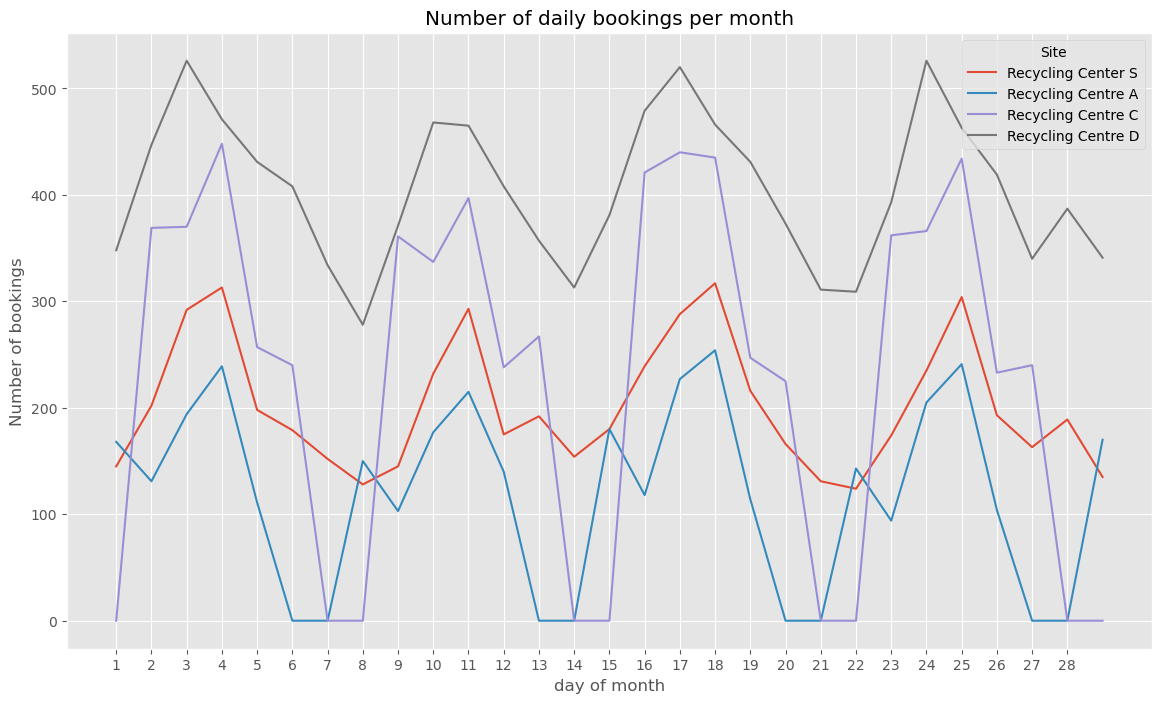

In [42]:
Booking_date_day=pd.to_datetime(Main_dataset['Booking_date'], format='%d-%m-%Y').dt.day

Number_bookings=pd.crosstab(Booking_date_day,Main_dataset['Site'])

Number_bookings_chart=Number_bookings.plot(kind='line'
                    ,xlabel = 'day of month'
                    ,ylabel = 'Number of bookings'
                    ,title = 'Number of daily bookings per month'
                    )
Number_bookings_chart.set_xticks(np.arange(1,Number_bookings.index[-1],1.0))
plt.show()

### Average number of bookings per day of the week per recycling centre

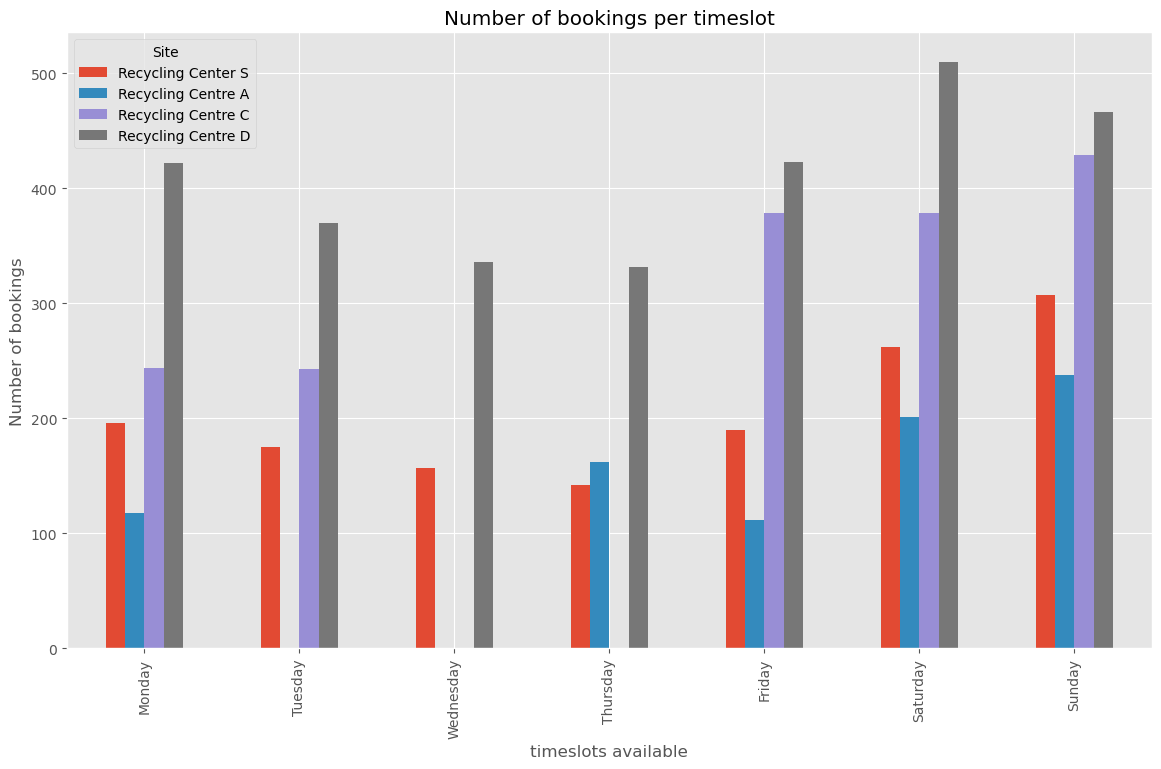

In [13]:
Ordered_weekday = ('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday')

bookings_per_site = pd.crosstab(Main_dataset['Booking_date_dayofweek'],Main_dataset['Site'])

Count_weekdays_month = Main_dataset[['Booking_date_dayofweek','Booking_date']].drop_duplicates('Booking_date').value_counts('Booking_date_dayofweek')

average_bookings_per_weekday = bookings_per_site.div(Count_weekdays_month, axis = 0).reindex(Ordered_weekday, axis=0)

average_bookings_per_weekday.plot(kind='bar',
                               xlabel = 'timeslots available',
                               ylabel = 'Number of bookings',
                               title = 'Number of bookings per timeslot')

plt.show()

### What are the materials brought the most to each recycling centre?

In [14]:
materials=Main_dataset.drop(columns=[
    'Are you hiring a vehicle?',
    'Booking_date',
    'Booking_date_dayofweek',
    'ClosureReason',
    'Booking created_date',
    'Booking created_time',
    'Booking_time',
    'Type of vehicle',
    'Vehicle reg',
    'Ward',
    'Postcode',
    'Are you hiring a vehicle?'])

materials_RCA = materials.loc[materials['Site']=='Recycling Centre A'].apply(pd.Series.value_counts).drop(['Recycling Centre A','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCA_top10 = materials_RCA.head(10).sort_values('Yes').squeeze()

materials_RCC = materials.loc[materials['Site']=='Recycling Centre C'].apply(pd.Series.value_counts).drop(['Recycling Centre C','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCC_top10 = materials_RCC.head(10).sort_values('Yes').squeeze()

materials_RCD = materials.loc[materials['Site']=='Recycling Centre D'].apply(pd.Series.value_counts).drop(['Recycling Centre D','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCD_top10 = materials_RCD.head(10).sort_values('Yes').squeeze()

materials_RCS = materials.loc[materials['Site']=='Recycling Center S'].apply(pd.Series.value_counts).drop(['Recycling Center S','No'], axis=0).dropna(how='all', axis=1).T.sort_values(by='Yes',ascending=False)
materials_RCS_top10 = materials_RCS.head(10).sort_values('Yes').squeeze()

Text(0.5, 1.0, 'Recycling Centre S')

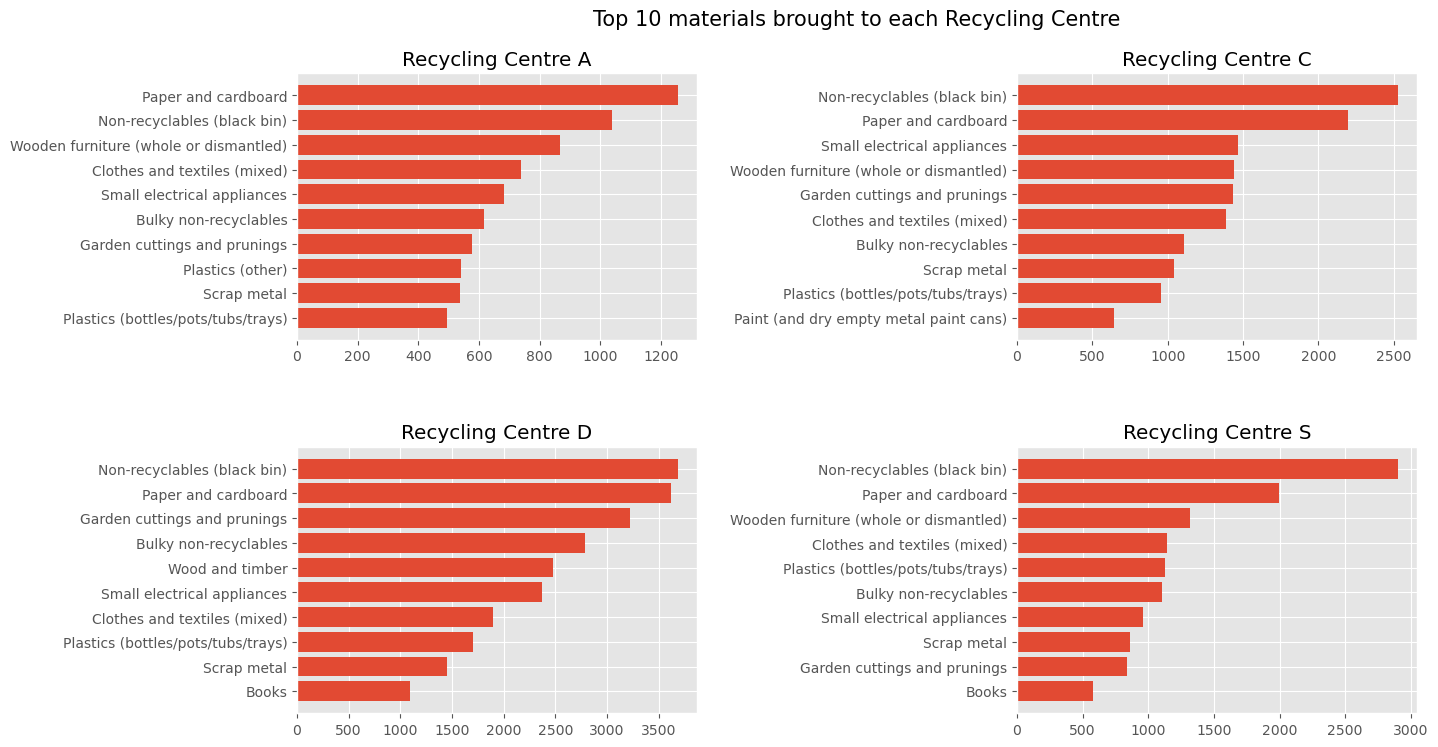

In [15]:
fig, axs = plt.subplots(2,2)
fig.suptitle('Top 10 materials brought to each Recycling Centre', size=15)
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.8, hspace=0.4)
axs[0,0].barh(materials_RCA_top10.index,materials_RCA_top10 )
axs[0,0].set_title('Recycling Centre A')
axs[0,1].barh(materials_RCC_top10.index,materials_RCC_top10)
axs[0,1].set_title('Recycling Centre C')
axs[1,0].barh(materials_RCD_top10.index,materials_RCD_top10)
axs[1,0].set_title('Recycling Centre D')
axs[1,1].barh(materials_RCS_top10.index,materials_RCS_top10)
axs[1,1].set_title('Recycling Centre S')

<hr style="margin-bottom: 40px;">

## Deep data analysis - per recycling centre

### User to select the recycling centre to be deep analysed

In [74]:
RCA_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Centre A'] 
RCC_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Centre C'] 
RCD_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Centre D'] 
RCS_data = Main_dataset.loc[Main_dataset['Site']=='Recycling Center S'] 

button=widgets.ToggleButtons(
    options=[('Recycling Center A', 'RCA_data'),
             ('Recycling Center C', 'RCC_data'),
             ('Recycling Center D', 'RCD_data'),
             ('Recycling Center S', 'RCS_data')],
            description='Please choose one of the recycling centre:',
            disabled=False,
            button_style='info',
           #     icons=['check'] * 4
)
display(button)

ToggleButtons(button_style='info', description='Please choose one of the recycling centre:', options=(('Recycl…

### Breakdown of bookings status and transport types used by residents to attend recycling centre

In [75]:
data_selected = globals()[button.value]

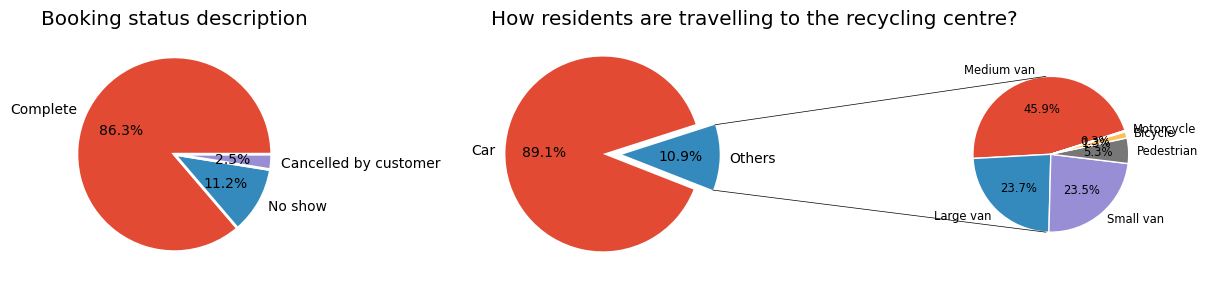

In [17]:


Vehicles_categ = data_selected['Type of vehicle'].value_counts(normalize=True)
       
#bookings categorisation 
pie_data = data_selected['ClosureReason'].value_counts(normalize=True).squeeze()

if len(Vehicles_categ)==1:
    
        fig, (ax1,ax2) = plt.subplots(1,2)

        fig.subplots_adjust(left=0.1, 
                            right=0.9, 
                            bottom=0.1, 
                            top=0.9, 
                            wspace=0.8, 
                            hspace=0.4)
        
        ax1.pie(labels = pie_data_data.index, 
                x=pie_data,
                autopct = '%.1f%%',
                wedgeprops={'edgecolor':'white',
                         'linewidth':2,
                         'antialiased':True}
        )
        
        ax1.set_title('Booking status description')

        ax2.pie(Vehicles_categ, 
                autopct = '%.f%%',
                labels=Vehicles_categ.index)
        
        ax2.set_title('How residents are travelling to the recycling centre?', loc='center')  

else:

        fig, (ax1,ax2,ax3) = plt.subplots(1,3)
        
        fig.subplots_adjust(left=0.1, 
                            right=0.9, 
                            bottom=0.1, 
                            top=0.9, 
                            wspace=0.8, 
                            hspace=0.4)
    
        ax1.pie(labels = pie_data.index, 
             x=pie_data,
             autopct = '%.1f%%',
             wedgeprops={'edgecolor':'white',
                         'linewidth':2,
                         'antialiased':True}
        )
        ax1.set_title('Booking status description')

        Vehicles_sub_categ = Vehicles_categ[Vehicles_categ<0.2]
        Vehicles_main_categ = pd.concat([pd.Series(Vehicles_categ[Vehicles_categ>0.2]),
                                         pd.Series(data=[sum(Vehicles_sub_categ)], 
                                                   index=['Others'])])                                                       

        #How are residents drivings to the recycling centres?     

        # large pie chart parameters
        Vehicles_main_categ
        Vehicles_main_categ.index
        explode = [0.1,0.1]
        ax2.set_title('How residents are travelling to the recycling centre?', loc='left')  

        # rotate so that first wedge is split by the x-axis
        angle = 20*Vehicles_main_categ.iloc[0]
        ax2.pie(Vehicles_main_categ,
                autopct='%1.1f%%', 
                startangle=angle,
                labels=Vehicles_main_categ.index, 
                explode=explode)

        # small pie chart parameters
        Vehicles_sub_categ
        Vehicles_sub_categ.index 
        width = .1


        ax3.pie(Vehicles_sub_categ, 
                autopct='%1.1f%%', 
                startangle=angle,
                labels=Vehicles_sub_categ.index, 
                radius=0.8, 
                textprops={'size': 'smaller'},
                wedgeprops={'edgecolor':'white',
                            'linewidth':1,
                            'antialiased':True})

        # use ConnectionPatch to draw lines between the two plots
        # get the wedge data
        theta1, theta2 = ax2.patches[1].theta1, ax2.patches[1].theta2
        center, r = ax2.patches[1].center, ax2.patches[1].r

        # draw top connecting line
        x = r * np.cos(np.pi / 180 * theta2) + center[0]
        y = np.sin(np.pi / 180 * theta2) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, .8), 
                              xyB=(x, y),
                              coordsA="data", 
                              coordsB="data", 
                              axesA=ax3,
                              axesB=ax2)
        con.set_color([0, 0, 0])
        con.set_linewidth(0.5)
        ax3.add_artist(con)

        # draw bottom connecting line
        x = r * np.cos(np.pi / 180 * theta1) + center[0]
        y = np.sin(np.pi / 180 * theta1) + center[1]
        con = ConnectionPatch(xyA=(- width / 2, -.8), xyB=(x, y), coordsA="data",
                        coordsB="data", axesA=ax3, axesB=ax2)
        con.set_color([0, 0, 0])
        ax3.add_artist(con)
        con.set_linewidth(0.5)

        plt.show()


### Average number of bookings per timeslot per weekday

In [18]:
Bookings_timeslot_weekday = pd.crosstab(data_selected['Booking_date_dayofweek'],data_selected['Booking_time']).reindex(Ordered_weekday, axis=0)

Count_weekdays_data_selected = data_selected[['Booking_date_dayofweek','Booking_date']].drop_duplicates('Booking_date').value_counts('Booking_date_dayofweek').reindex(Ordered_weekday, axis=0)

average_bookings_timeslot_weekday= Bookings_timeslot_weekday.div(Count_weekdays_data_selected, axis = 0).dropna().T

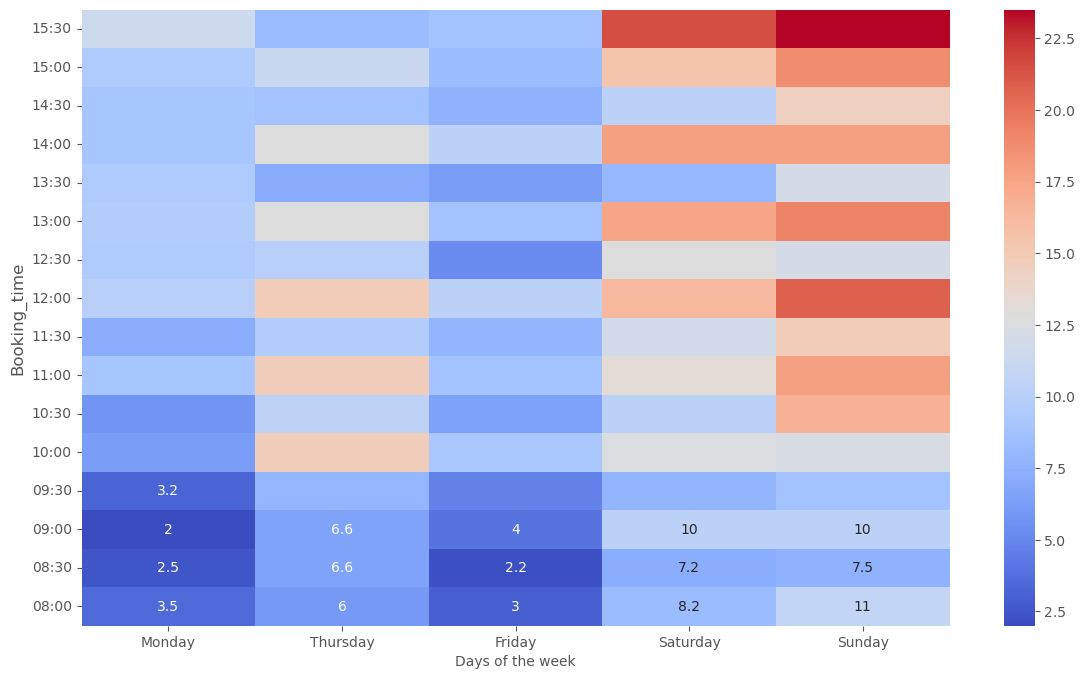

In [19]:
sns.heatmap(average_bookings_timeslot_weekday,
            cmap="coolwarm",
            annot=True,
            
)
plt.yticks(rotation=0) 
plt.xlabel('Days of the week',
           fontsize=10)
plt.ylim([0,16])
plt.show()

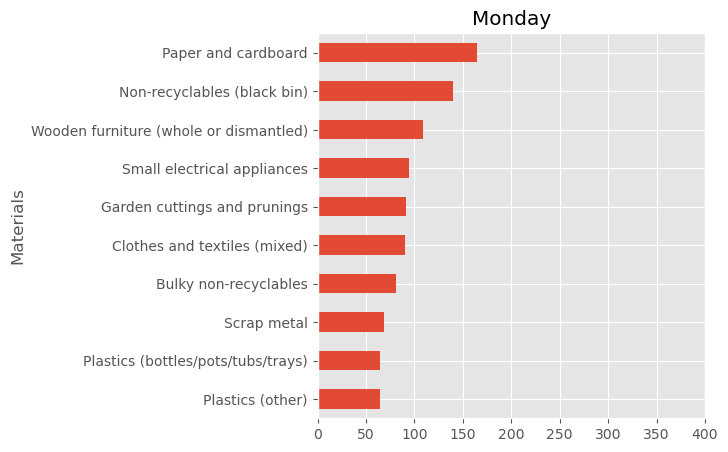

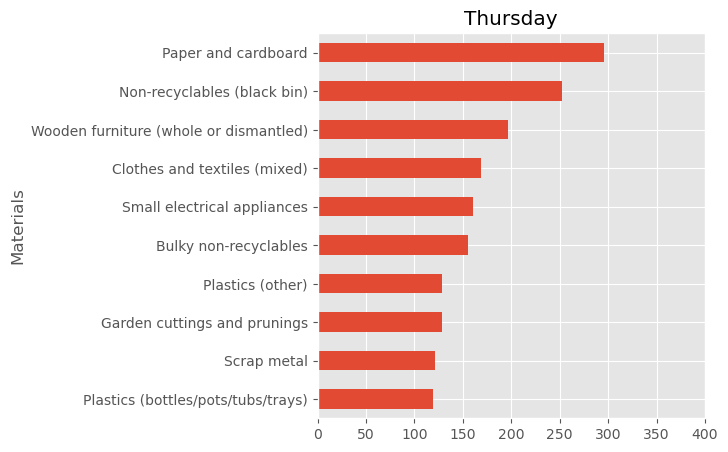

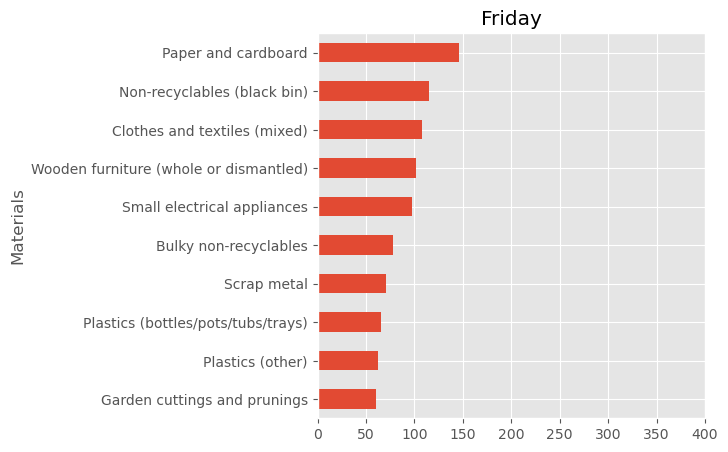

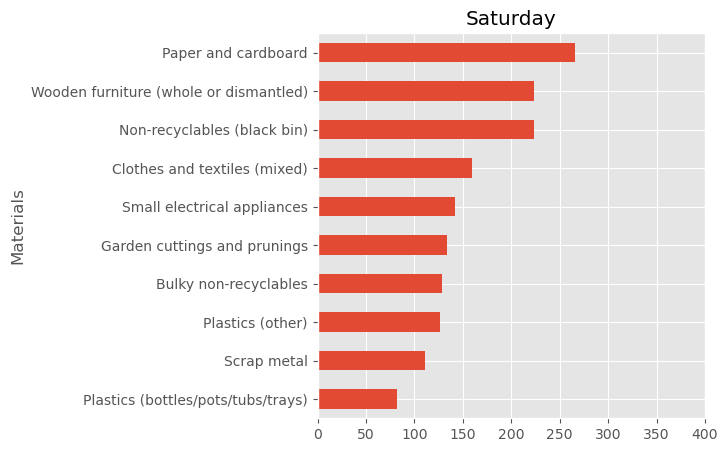

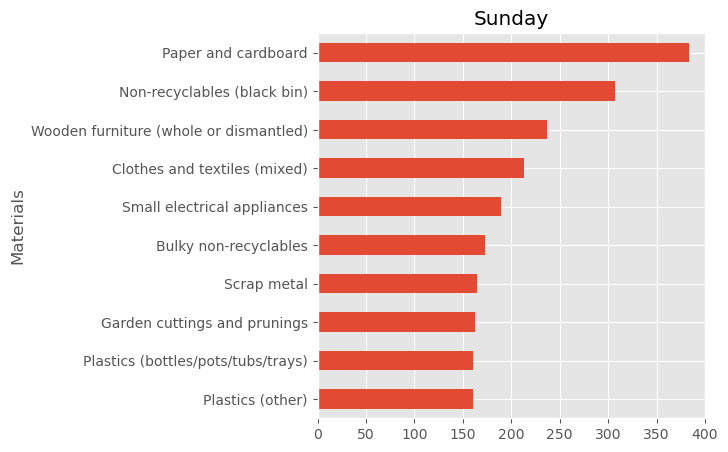

In [20]:
materials2=data_selected.drop(columns=[
    'Are you hiring a vehicle?',
    'Booking_date',
    'ClosureReason',
    'Booking created_date',
    'Booking created_time',
    'Booking_time',
    'Type of vehicle',
    'Vehicle reg',
    'Ward',
    'Postcode',
    'Are you hiring a vehicle?'])

dayofweek_unique = materials2['Booking_date_dayofweek'].unique()
dayofweek_unique_ordered=sorted(dayofweek_unique,key=Ordered_weekday.index)

for i in dayofweek_unique_ordered:
    new_variable_name = f"Materials2_{i[0:3]}"
    globals()[new_variable_name] = materials2.loc[materials2['Booking_date_dayofweek']==i].drop(['Site','Booking_date_dayofweek'], axis=1).apply(pd.Series.value_counts).drop(index='No').T.dropna().rename(columns={'Yes':i}).sort_values(i,ascending=False)
    subset = f"charts_Materials2_{i[0:3]}"
    globals()[subset] = globals()[new_variable_name].head(10).plot(kind="barh",legend=False, figsize=(5,5))
    plt.title(i)
    plt.ylabel('Materials')
    plt.xlim([0,400])
    plt.gca().invert_yaxis()

In [76]:
# set the filepath and load in a shapefile
#! C:\Users\Tiago S\Desktop\Github repositories\Python_Coding\Booking system project\VirtualEnv\Scripts\python.exe

import pgeocode
import plotly.express as px

nomi = pgeocode.Nominatim('gb')
data_selected.loc[:,['latitude']]= data_selected['Postcode'].apply(lambda x: nomi.query_postal_code(x).loc['latitude'])
data_selected.loc[:,['longitude']]=data_selected['Postcode'].apply(lambda x: nomi.query_postal_code(x).loc['longitude'])


In [103]:

fig = px.scatter_mapbox(data_selected, lat="latitude", lon="longitude", zoom=10, height=300).update_traces(marker={"size":10})
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(height = 500,margin={"r":0,"t":0,"l":0,"b":0})
fig.show()